In [320]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, cross_val_predict
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier,NeighborhoodComponentsAnalysis,LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [321]:
#Reading the the dataset
df= pd.read_csv(("C:\\Users\\kwind\\Downloads\\data.csv"))


In [355]:
df.head()


,type,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [356]:
df.tail()

,type,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [358]:
df.shape

(569, 31)

In [323]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [324]:
df.isnull().sum().sort_values(ascending=False)


Unnamed: 32                569
compactness_se               0
fractal_dimension_worst      0
symmetry_worst               0
concave points_worst         0
concavity_worst              0
compactness_worst            0
smoothness_worst             0
area_worst                   0
perimeter_worst              0
texture_worst                0
radius_worst                 0
fractal_dimension_se         0
symmetry_se                  0
concave points_se            0
concavity_se                 0
id                           0
diagnosis                    0
area_se                      0
perimeter_se                 0
texture_se                   0
radius_se                    0
fractal_dimension_mean       0
symmetry_mean                0
concave points_mean          0
concavity_mean               0
compactness_mean             0
smoothness_mean              0
area_mean                    0
perimeter_mean               0
texture_mean                 0
radius_mean                  0
smoothne

In [325]:
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

Unnamed: 32                100.0
compactness_se               0.0
fractal_dimension_worst      0.0
symmetry_worst               0.0
concave points_worst         0.0
concavity_worst              0.0
compactness_worst            0.0
smoothness_worst             0.0
area_worst                   0.0
perimeter_worst              0.0
texture_worst                0.0
radius_worst                 0.0
fractal_dimension_se         0.0
symmetry_se                  0.0
concave points_se            0.0
concavity_se                 0.0
id                           0.0
diagnosis                    0.0
area_se                      0.0
perimeter_se                 0.0
texture_se                   0.0
radius_se                    0.0
fractal_dimension_mean       0.0
symmetry_mean                0.0
concave points_mean          0.0
concavity_mean               0.0
compactness_mean             0.0
smoothness_mean              0.0
area_mean                    0.0
perimeter_mean               0.0
texture_me

In [326]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [327]:
#counting the number of columns in the dataset
df.shape[1]

33

In [328]:
# removing the columns from the dataset.
df.drop(['id','Unnamed: 32'], inplace= True, axis = 1)

In [329]:
df.shape[1]

31

In [330]:
# changing the column diagnosis to  from the new coloumn type .
df = df.rename(columns = {"diagnosis":"type"})

In [331]:
df["type"] = [1 if str(i).strip() == "M" else 0 for i in df["type"]]
y = df["type"]

In [332]:
df

,type,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


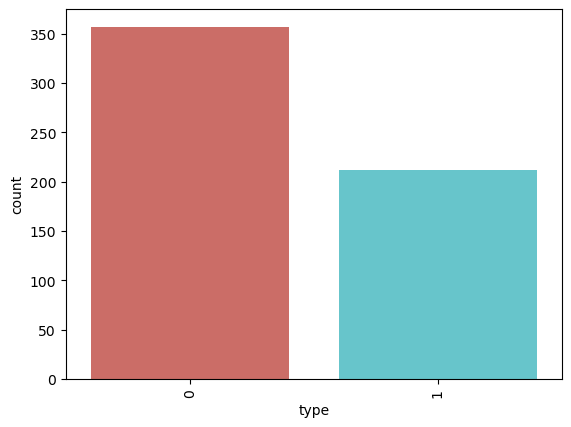

0    357
1    212
Name: type, dtype: int64


In [333]:

sns.countplot(x = df['type'], data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

print(df["type"].value_counts())


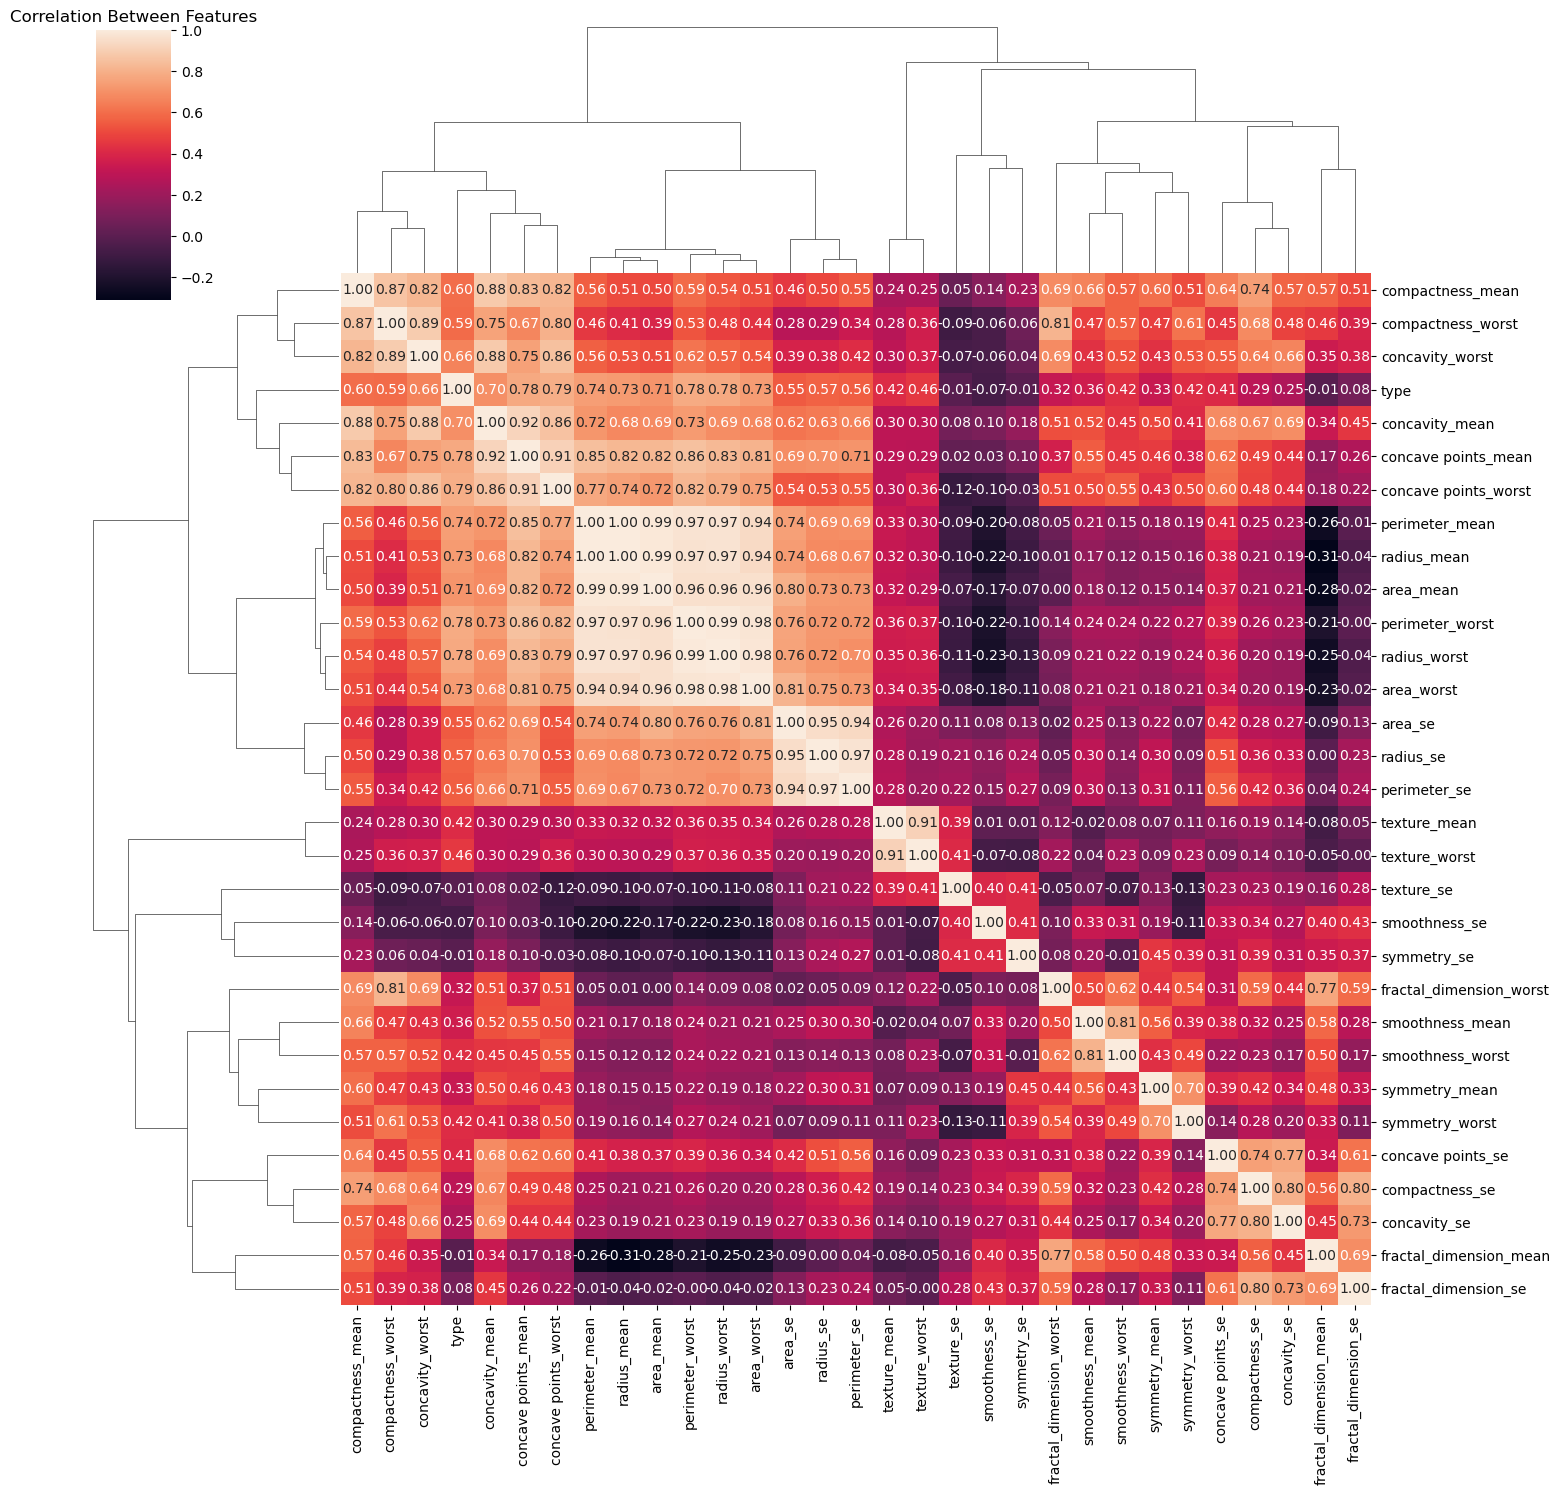

In [334]:
corr_matrix = df.corr()
sns.clustermap(corr_matrix,annot = True,fmt = ".2f",figsize = (15,15))
plt.title("Correlation Between Features")
plt.show()

In [335]:
correlation_matrix = df.corr().round(2)
correlation_matrixSS

,type,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
type,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,...,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


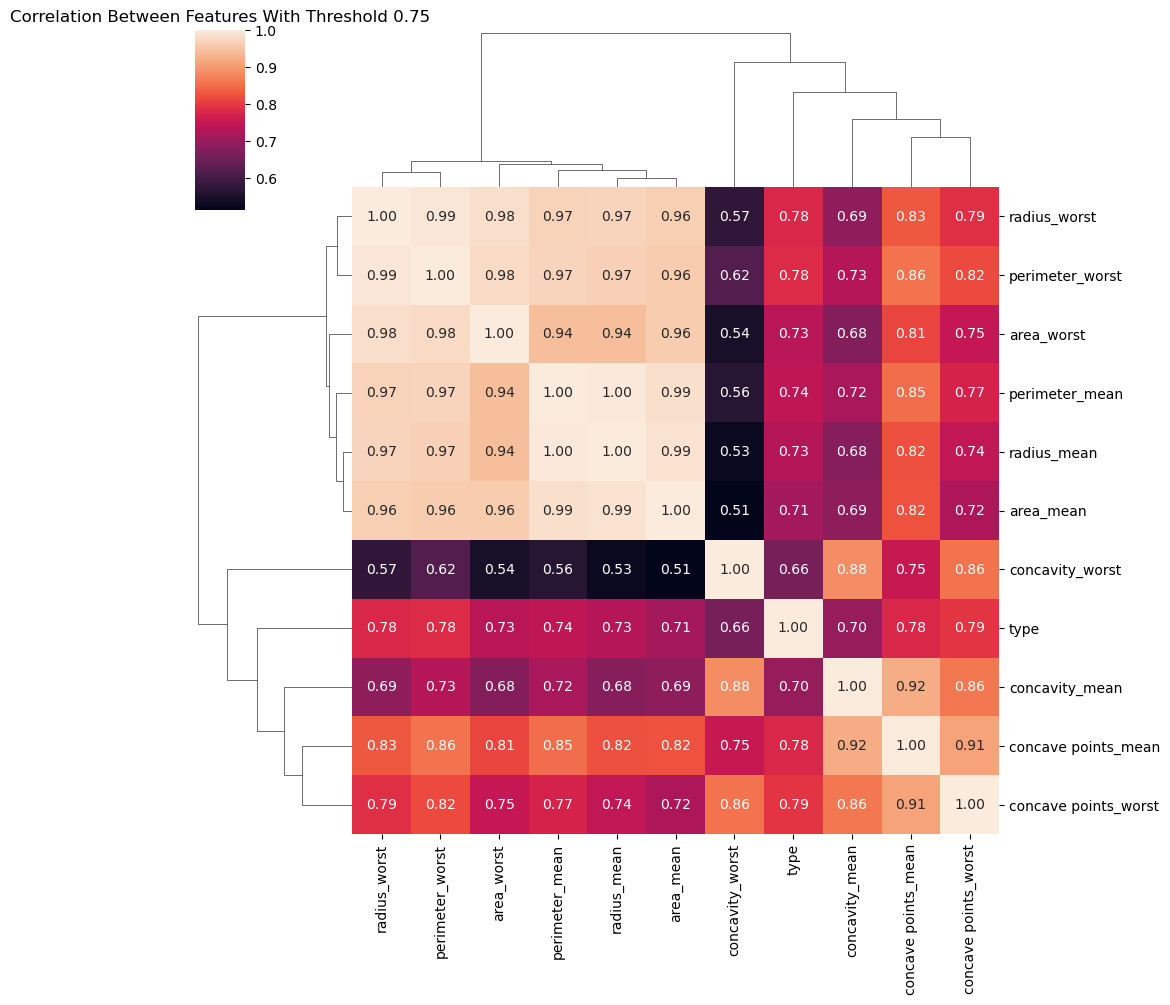

In [336]:
threshold = 0.6
filter1 = np.abs(corr_matrix["type"] > threshold) # Features which have more than 0.75 correlation with 'type'
corr_features = corr_matrix.columns[filter1].tolist()
sns.clustermap(df[corr_features].corr(),annot = True,fmt = ".2f",figsize = (10,10))
plt.title("Correlation Between Features With Threshold 0.75")
plt.show()

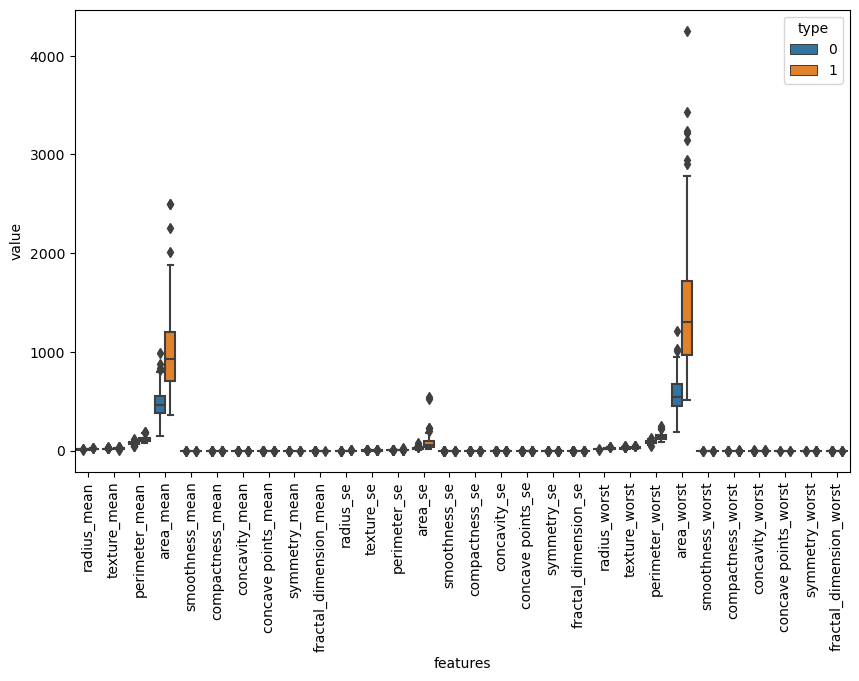

In [337]:
#First melt() the data
df_melted = pd.melt(df, id_vars="type", var_name="features", value_name="value")

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="features", y="value", hue="type", data=df_melted)
plt.xticks(rotation=90)
plt.show()

In [338]:
y = df["type"]
x = df.drop(["type"], axis=1)
columns = x.columns.tolist()

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame({"score": x_score})

In [339]:
y_pred

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1

In [340]:
outlier_score.sort_values(by = ["score"],ascending = True).head()

,score
461,-3.134467
212,-2.251552
38,-2.233433
265,-2.191808
101,-2.141954


In [341]:
threshold2 = -2.5
outlier_index = outlier_score.query("score < @threshold2").index.tolist()
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

In [342]:
test_size = 0.3
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = test_size,random_state = 42)

In [343]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train_df = pd.DataFrame(x_train,columns = columns)
x_train_df["type"] = y_train

In [344]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
score = knn.score(x_test,y_test)
print("Score",score)
print("CM",cm)
print("Basic KNN acc",acc)

Score 0.9532163742690059
CM [[108   1]
 [  7  55]]
Basic KNN acc 0.9532163742690059


In [345]:
# 108 true negatives (TN)
# 55 true positives (TP)
# 7 false positives (FP)
# 1 false negative (FN)

# The model, based on the given information, appears to be effective and accurate in its predictions.
# It's important to consider the specific context of the problem and the importance of false positives and false negatives depending on the application.

In [346]:
model = RandomForestClassifier(class_weight="balanced",random_state=0)
k = 5

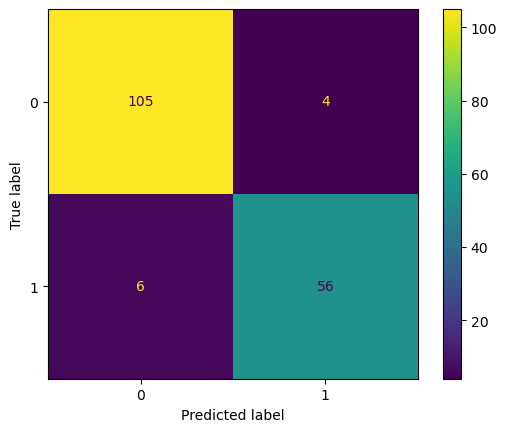

RandomForestClassifier(class_weight='balanced', random_state=0)

In [347]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

scores = cross_val_score(model, x_train, y_train, cv=k, scoring='accuracy')
predictions = cross_val_predict(model, x_test, y_test, cv=k)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

model.fit(x_train,y_train)

In [348]:
print(f"Accuracy scores for {k} folds: {scores}")
print(f"Mean accuracy score: {np.mean(scores)}")

#use k-fold cross validation to generate predictions on test data
predictions = cross_val_predict(model, x_test, y_test, cv=k)
print(f"Accuracy score on test data: {accuracy_score(y_test, predictions)}")

#calculate precision and recall scores
print(f"Precision score on test data: {precision_score(y_test, predictions)}")
print(f"Recall score on test data: {recall_score(y_test, predictions)}")

Accuracy scores for 5 folds: [0.95       0.95       0.92405063 0.94936709 0.97468354]
Mean accuracy score: 0.9496202531645569
Accuracy score on test data: 0.9415204678362573
Precision score on test data: 0.9333333333333333
Recall score on test data: 0.9032258064516129


In [349]:

# # In summary, the model exhibits consistent and high performance across 
# 5-fold cross-validation, with accuracy scores ranging from 92.4% to 97.5%
# . The mean accuracy score, indicative of overall model performance, is 
# approximately 94.96%. On the test data, the model maintains strong
# performance with an accuracy of about 94.15%. Additionally, precision and 
# recall on the test data are 93.33% and 90.32%, respectively, highlighting 
# the model's ability to make accurate positive predictions and capture positive 
# instances. Overall, these findings suggest that the model generalizes well and
# demonstrates effective classification performance. Consideration of precision and
# recall helps assess the specific trade-offs relevant to the application's requirements.

Training Acc 98.99
Test acc 98.25


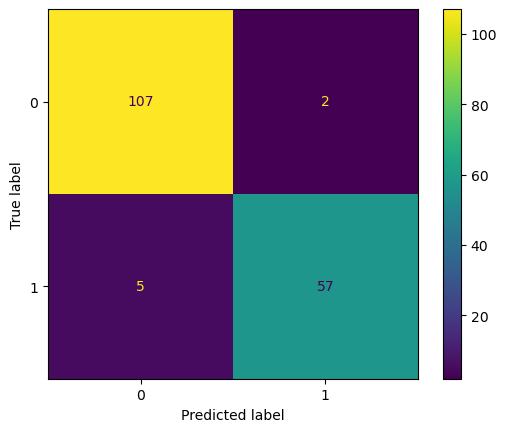

In [350]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Training Acc",round(lr.score(x_train,y_train)*100,2))
print("Test acc",round(lr.score(x_test,y_test)*100,2))

scores = cross_val_score(lr, x_train, y_train, cv=k, scoring='accuracy')
predictions = cross_val_predict(lr, x_test, y_test, cv=k)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [351]:

def knn_best_parameters(x_train,x_test,y_train,y_test):
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
   
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn,param_grid,cv = 10,scoring = "accuracy")
    grid.fit(x_train,y_train)
    print("Best training score: {} with parameters: {}".format(grid.best_score_,grid.best_params_))
    
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train,y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test,y_pred_test)
    acc_train = accuracy_score(y_train,y_pred_train)
    
    print("Test Score: {}, Train Score: {}".format(acc_test,acc_train))
    print("CM Test : {}".format(cm_test))
    print("CM Train : {}".format(cm_train))
    
    
    return grid

grid = knn_best_parameters(x_train,x_test,y_train,y_test)



Best training score: 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}
Test Score: 0.9590643274853801, Train Score: 0.9773299748110831
CM Test : [[107   2]
 [  5  57]]
CM Train : [[248   0]
 [  9 140]]


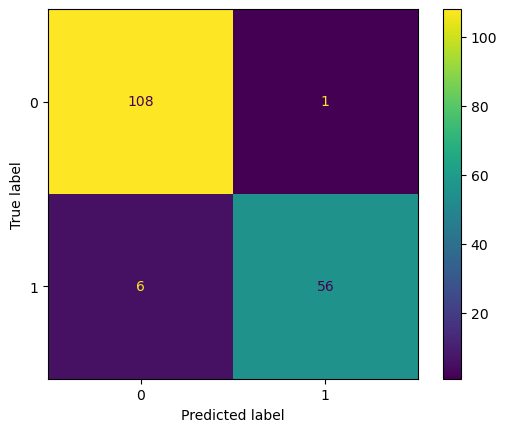

In [352]:
scores = cross_val_score(grid, x_train, y_train, cv=k, scoring='accuracy')
predictions = cross_val_predict(grid, x_test, y_test, cv=k)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [353]:
# We found that the best parameters for training would be n_neighbors = 4, and the weights = "uniform

In [354]:
# # 4, 'weights': 'uniform'}, achieved a best
# training accuracy of 96.7%. On the test data,
# the model demonstrated strong generalization 
# with an accuracy of 95.9%. The confusion matrices
# reveal successful classification, with low false
# positives and false negatives. The model effectively
# learns patterns from the training data and performs well
# on new, unseen data. Overall, it shows promising performance
# with high accuracy on both training and test datasets.